# Exploring the Example Dataset

In [229]:
import sys  
sys.path.insert(0, '../../codes/')
import seaborn as sns
from predict_observational_dataset_v2 import ProcessObservationalDataset
from train_cnn_regression_3 import *
from bokeh.palettes import colorblind


# Step 1: Load the dataset

In [230]:
# original dataset
df=pd.read_csv('../../datasets/browndwarf_R100_v4_newWL_v4_augmented.csv.bz2', compression='bz2')
df.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


In [231]:
df['is_augmented'].value_counts()

GuassErr_std0.05    61776
GuassErr_std0.02    61776
GuassErr_std0.1     61776
no                  30888
Gauss.02            30888
Gauss.05            30888
Gauss.1             30888
Conv5               30888
Conv10              30888
Conv15              30888
Name: is_augmented, dtype: int64

In [233]:
wl = pd.read_csv('../../datasets/wl.csv')
wl.head(5)

,wl
0,2.511960
1,2.486966
2,2.462220
3,2.437720
4,2.413464


In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_filtered_dataframe(dataset, filter_bounds, feature_to_plot, title_label):
    """
    Plot a DataFrame with a single x-axis (using column names) and multiple y-axes.

    Parameters:
        - df (pd.DataFrame): DataFrame containing the data to be plotted.
    """

    
    filtered_df = dataset.copy()
    for feature, bounds in filter_bounds.items():
        lower_bound, upper_bound = bounds
        filtered_df = filtered_df[(filtered_df[feature] >= lower_bound) & (filtered_df[feature] <= upper_bound)]
        
    filtered_df2 = filtered_df.sort_values(feature_to_plot, ascending = False).iloc[::1,4:-1][::-1] 
    fig, ax = plt.subplots(figsize=(10, 3))

    x = filtered_df2.columns
    df_transposed = filtered_df2.T  # Transpose the DataFrame

    # Define a color palette
    num_colors = len(df_transposed.columns)   # Number of colors needed (excluding x-axis)
    colors = sns.color_palette('magma', num_colors)

    for i, col in enumerate(df_transposed.columns):
        # print(col)
        if col != 'x':  # Skip the x-axis column
            ax.semilogy(wl.wl, df_transposed[col], 
                        # label=data[col][:4].values, 
                        color=colors[i], alpha = 0.7)
    # print(filtered_data.T[col][:4].values[0])
    ax.set_xlabel('Wavelength  [$\mu$m]')
    ax.set_ylabel(r'F$_{\nu}$  [erg/cm$^2$/s/Hz]')
    dict_features = {'temperature':'Temperature', 'gravity':'gravity', 'metallicity':'metallicity', 'c_o_ratio':'C/O ratio'}
    ax.set_title('Augmented '+dict_features[feature_to_plot]+" dataset "+title_label)
    # ax.legend()

    # Get the minimum and maximum values from the data
    # vmin = df_transposed.values.min()
    # vmax = df_transposed.values.max()

    # Add colorbar
    cmap = sns.color_palette('magma', as_cmap=True)
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, 
            norm=plt.Normalize(vmin=filter_bounds[feature_to_plot][0], vmax=filter_bounds[feature_to_plot][1])), ax=ax)
    dict_features2 = {'temperature':'T [K]', 'gravity':'log$g$', 'metallicity':'[M/H]', 'c_o_ratio':'C/O ratio'}
    cbar.set_label(dict_features2[feature_to_plot])
    
    plt.savefig('../../outputs/regression/figures/'+'Augmented_'+feature_to_plot+"_dataset.pdf", dpi=500, bbox_inches='tight')
    
    
    
    plt.show()


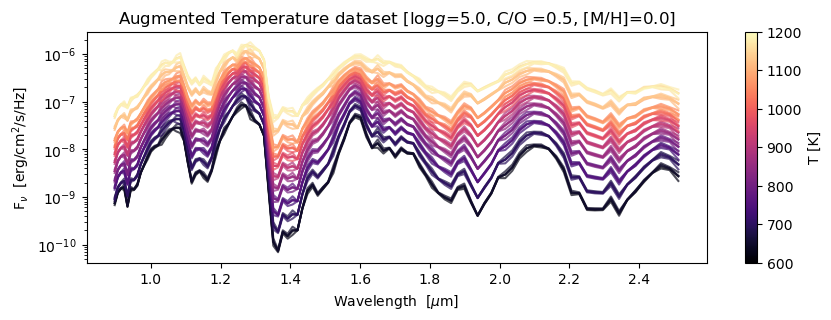

In [235]:
# Define the filter bounds
filter_bounds = {'gravity': (5.,5), 
                 'c_o_ratio' : (0.5,0.5),
                 'metallicity' : (0.0,0.0),
                 'temperature': (600, 1200)}

# Call the function to filter the dataset
plot_filtered_dataframe(df[df['is_augmented'].isin(
                                    ['GuassErr_std0.01',
                                     'GuassErr_std0.02',
                                     'GuassErr_std0.1',
                                     'no'])], 
                                       filter_bounds,
                                       'temperature',
                                     title_label = '[log$g$='+str(filter_bounds['gravity'][0])+
                                    ', C/O ='+str(filter_bounds['c_o_ratio'][0])+
                                    ', [M/H]='+str(filter_bounds['metallicity'][0])+
                        ']')

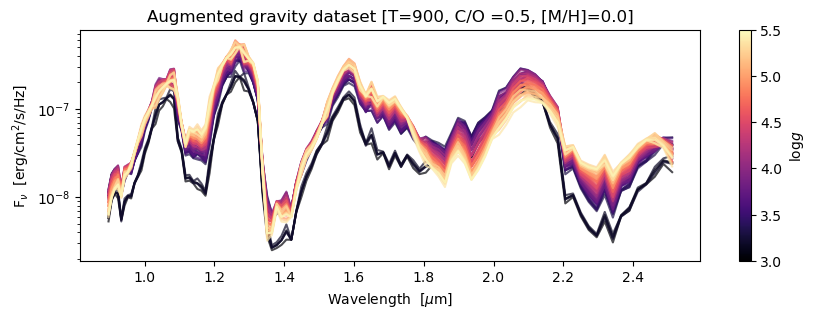

In [236]:
# Define the filter bounds
filter_bounds = {'gravity': (3,5.5), 
                 'c_o_ratio' : (0.5,0.5),
                 'metallicity' : (0.0,0.0),
                 'temperature': (900, 900)}

# Call the function to filter the dataset
plot_filtered_dataframe(df[df['is_augmented'].isin(
                                    ['GuassErr_std0.01',
                                     'GuassErr_std0.02',
                                     'GuassErr_std0.1',
                                     'no'])], 
                                       filter_bounds,
                                       'gravity',                                     
                        title_label = '[T='+str(filter_bounds['temperature'][0])+
                                    ', C/O ='+str(filter_bounds['c_o_ratio'][0])+
                                    ', [M/H]='+str(filter_bounds['metallicity'][0])+
                        ']')

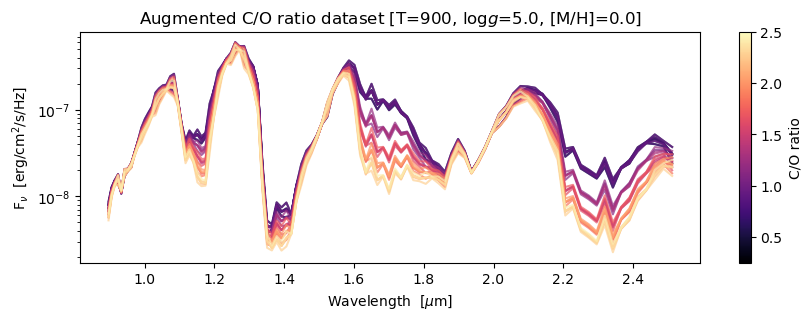

In [237]:
# Define the filter bounds
filter_bounds = {'gravity': (5.,5), 
                 'c_o_ratio' : (0.25,2.5),
                 'metallicity' : (0.0,0.0),
                 'temperature': (900, 900)}

# Call the function to filter the dataset
plot_filtered_dataframe(df[df['is_augmented'].isin(
                                    ['GuassErr_std0.01',
                                     'GuassErr_std0.02',
                                     'GuassErr_std0.1',
                                     'no'])], 
                                       filter_bounds,
                                       'c_o_ratio',                                     
                        title_label = '[T='+str(filter_bounds['temperature'][0])+
                                    ', log$g$='+str(filter_bounds['gravity'][0])+
                                    ', [M/H]='+str(filter_bounds['metallicity'][0])+
                        ']')

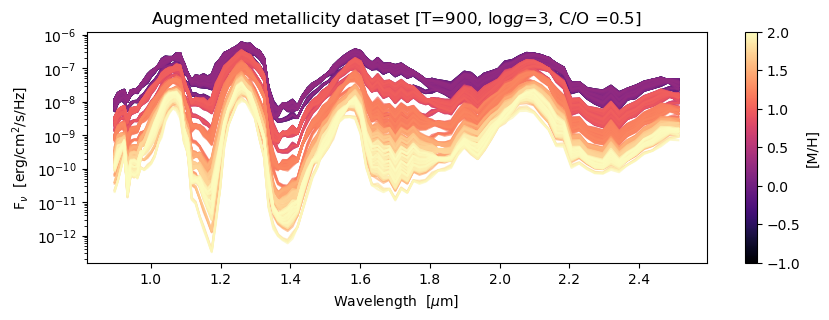

In [238]:
# Define the filter bounds
filter_bounds = {'gravity': (3,5.5), 
                 'c_o_ratio' : (0.5,0.5),
                 'metallicity' : (-1.,2.),
                 'temperature': (900, 900)}

# Call the function to filter the dataset
plot_filtered_dataframe(df[df['is_augmented'].isin(
                                    ['GuassErr_std0.01',
                                     'GuassErr_std0.02',
                                     'GuassErr_std0.1',
                                     'no'])], 
                                       filter_bounds,
                                       'metallicity',                                     
                        title_label = '[T='+str(filter_bounds['temperature'][0])+
                                    ', log$g$='+str(filter_bounds['gravity'][0])+
                                    ', C/O ='+str(filter_bounds['c_o_ratio'][0])+
                        ']')